In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance

In [4]:
data = pd.read_csv("/content/drive/MyDrive/traffic/tfidf_embeddings_class2.csv")
data

,06pm,07pm,10th,1line,20min,2nd,30th,34th,3line,3rd,...,yet,york,you,youll,your,youre,yours,youve,yrs,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.285451,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.dtypes

06pm     float64
07pm     float64
10th     float64
1line    float64
20min    float64
          ...   
youre    float64
yours    float64
youve    float64
yrs      float64
zone     float64
Length: 1000, dtype: object

In [6]:
X=data.drop(["class"], axis=1)
y=data["class"]

In [7]:
X

,06pm,07pm,10th,1line,20min,2nd,30th,34th,3line,3rd,...,yet,york,you,youll,your,youre,yours,youve,yrs,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.285451,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data["class"].value_counts()

0    1000
1    1000
Name: class, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=42,shuffle = True)

In [10]:
ttw1a = []
tw1a = []
tth1a = []
th1a = []
ttw1p = []
tw1p = []
tth1p = []
th1p = []
ttw1r = []
tw1r = []
tth1r = []
th1r = []
ttw1f = []
tw1f = []
tth1f = []
th1f = []

Accuracy of XGBoost: 0.9325
Precision of XGBoost: 0.9330537836147593
Recall of XGBoost: 0.9325
F1-score of XGBoost: 0.9324911401266321
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       198
           1       0.95      0.92      0.93       202

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



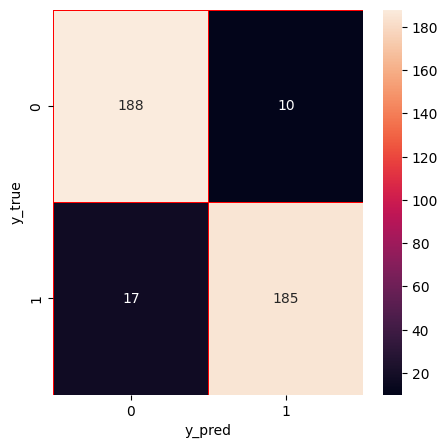

In [12]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
tw1a.append(xg_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.95875
Precision of XGBoost: 0.9598948743098163
Recall of XGBoost: 0.95875
F1-score of XGBoost: 0.9587216191619913
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       802
           1       0.98      0.93      0.96       798

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



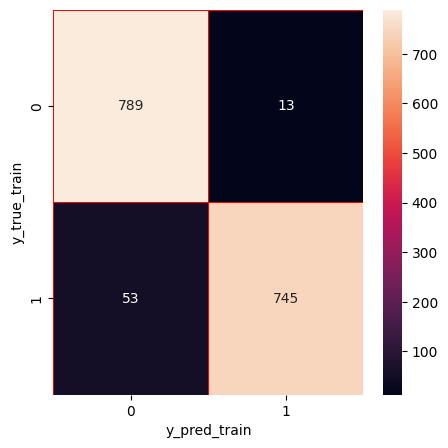

In [13]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(xg_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [14]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:21<00:00,  1.08s/trial, best loss: -0.9525]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.4232759855339314, 'max_depth': 85.0, 'n_estimators': 45.0}


Accuracy of XGBoost: 0.9525
Precision of XGBoost: 0.95250893951139
Recall of XGBoost: 0.9525
F1-score of XGBoost: 0.9524985153930302
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       198
           1       0.95      0.96      0.95       202

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



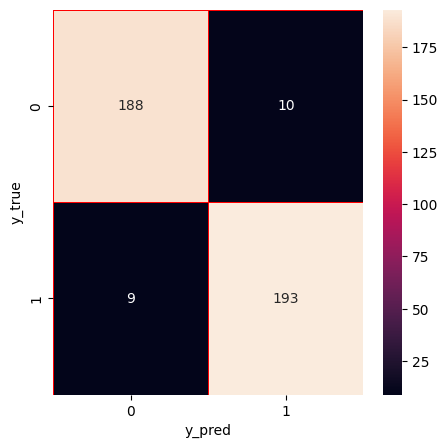

In [15]:
xg = xgb.XGBClassifier(learning_rate= 0.38356772019011537, n_estimators =15, max_depth = 84)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(xg_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.998125
Precision of XGBoost: 0.9981319875776399
Recall of XGBoost: 0.998125
F1-score of XGBoost: 0.9981249846188461
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



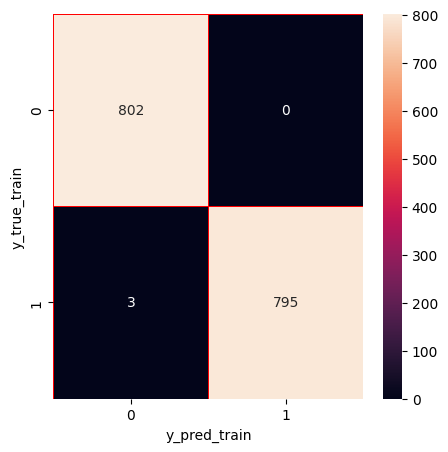

In [16]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(xg_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [17]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Accuracy of RF: 0.9675
Precision of RF: 0.9676003752345216
Recall of RF: 0.9675
F1-score of RF: 0.9674957330682521
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       198
           1       0.96      0.98      0.97       202

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



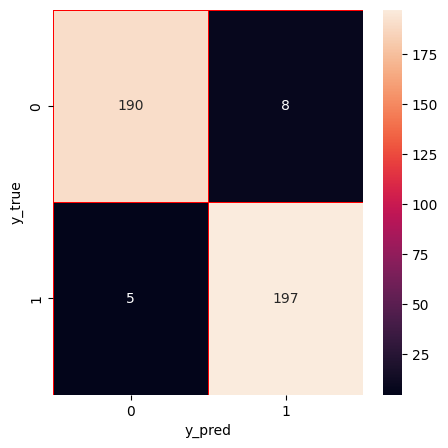

In [18]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(rf_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 1.0
Precision of RF: 1.0
Recall of RF: 1.0
F1-score of RF: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



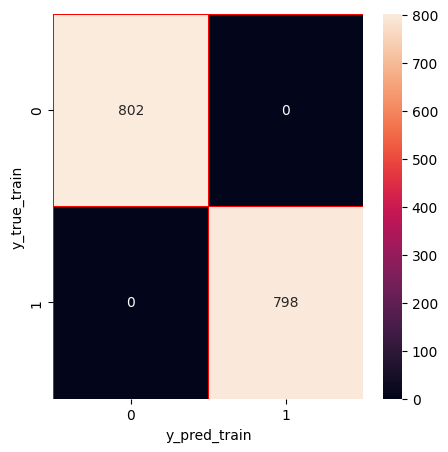

In [19]:
rf_score=rf.score(X_train,y_train)
y_predict=rf.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(rf_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [20]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:04<00:00,  4.75trial/s, best loss: -0.9625]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 38.0, 'max_features': 9.0, 'min_samples_leaf': 5.0, 'min_samples_split': 8.0, 'n_estimators': 198.0}


Accuracy of RF: 0.9325
Precision of RF: 0.9349939745424419
Recall of RF: 0.9325
F1-score of RF: 0.9324303379430694
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       198
           1       0.97      0.90      0.93       202

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



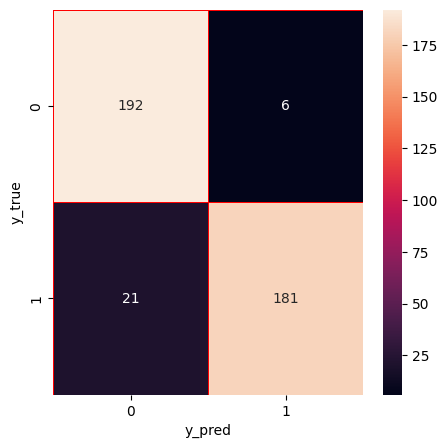

In [21]:
rf_hpo = RandomForestClassifier(n_estimators = 31, min_samples_leaf = 3, max_depth = 5, min_samples_split = 5, max_features = 16, criterion = 'entropy')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(rf_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.9475
Precision of RF: 0.9487302527646131
Recall of RF: 0.9475
F1-score of RF: 0.9474603461298479
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       802
           1       0.97      0.92      0.95       798

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



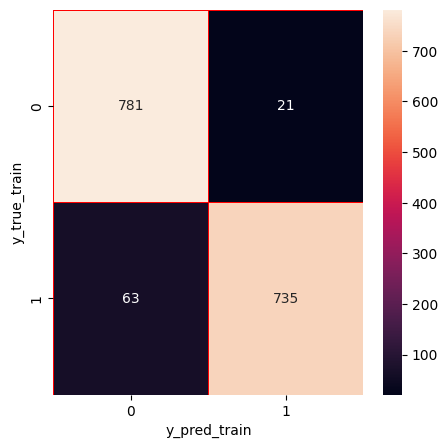

In [22]:
rf_score=rf_hpo.score(X_train,y_train)
y_predict=rf_hpo.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(rf_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [23]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

Accuracy of DT: 0.8975
Precision of DT: 0.8975741088180113
Recall of DT: 0.8975
F1-score of DT: 0.8974865427537182
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       198
           1       0.89      0.91      0.90       202

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



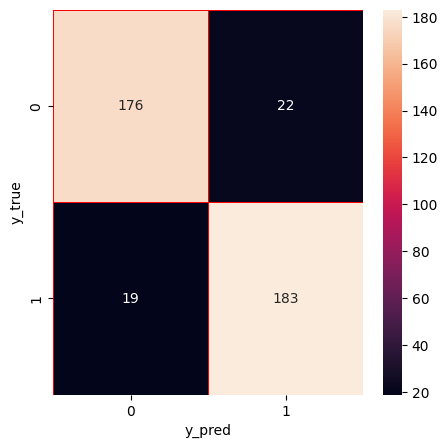

In [24]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(dt_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 1.0
Precision of DT: 1.0
Recall of DT: 1.0
F1-score of DT: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



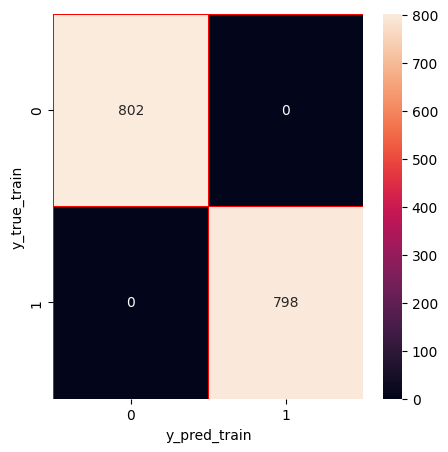

In [25]:
dt_score=dt.score(X_train,y_train)
y_predict=dt.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
ttw1a.append(dt_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [26]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:01<00:00, 30.77trial/s, best loss: -0.935]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 36.0, 'max_features': 19.0, 'min_samples_leaf': 5.0, 'min_samples_split': 7.0}


Accuracy of DT: 0.8575
Precision of DT: 0.8577591208021805
Recall of DT: 0.8575
F1-score of DT: 0.8574955468471677
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       198
           1       0.87      0.85      0.86       202

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



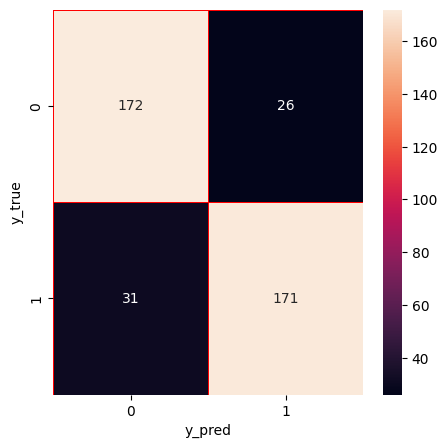

In [27]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 9, max_depth = 37, min_samples_split = 4, max_features = 17, criterion = 'gini')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
th1a.append(dt_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.8925
Precision of DT: 0.89290634151836
Recall of DT: 0.8925
F1-score of DT: 0.8924672345746552
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       802
           1       0.91      0.88      0.89       798

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



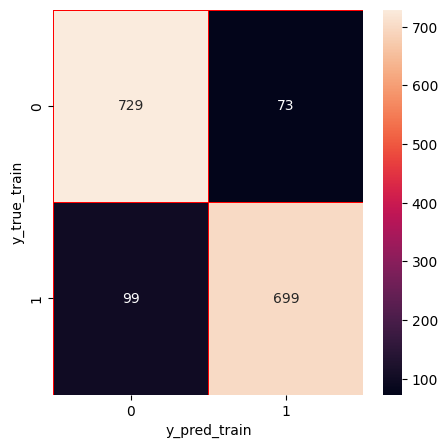

In [28]:
dt_score=dt_hpo.score(X_train,y_train)
y_predict=dt_hpo.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(dt_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [29]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

Accuracy of ET: 0.9675
Precision of ET: 0.9684348905438952
Recall of ET: 0.9675
F1-score of ET: 0.9674762092460161
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       198
           1       0.95      0.99      0.97       202

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



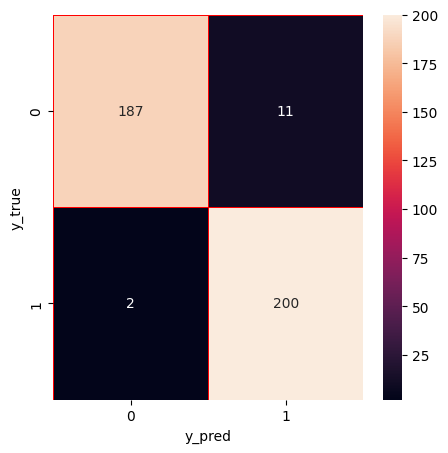

In [30]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
tw1a.append(et_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 1.0
Precision of ET: 1.0
Recall of ET: 1.0
F1-score of ET: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



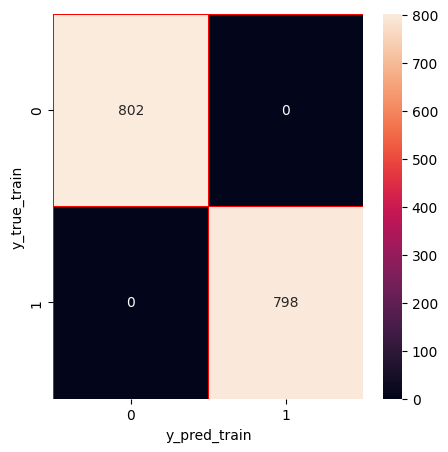

In [31]:
et_score=et.score(X_train,y_train)
y_predict=et.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(et_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [32]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:02<00:00,  7.22trial/s, best loss: -0.9625]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 20.0, 'max_features': 12.0, 'min_samples_leaf': 2.0, 'min_samples_split': 7.0, 'n_estimators': 186.0}


Accuracy of ET: 0.9675
Precision of ET: 0.9678003800855193
Recall of ET: 0.9675
F1-score of ET: 0.9674989843686523
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       198
           1       0.98      0.96      0.97       202

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



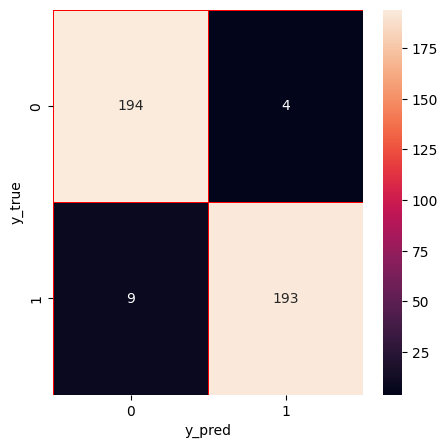

In [33]:
et_hpo = ExtraTreesClassifier(n_estimators = 62, min_samples_leaf = 1, max_depth = 19, min_samples_split = 3, max_features = 12, criterion = 'gini')
et_hpo.fit(X_train,y_train)
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(et_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.98125
Precision of ET: 0.9819260817307693
Recall of ET: 0.98125
F1-score of ET: 0.9812425259218617
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       802
           1       1.00      0.96      0.98       798

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



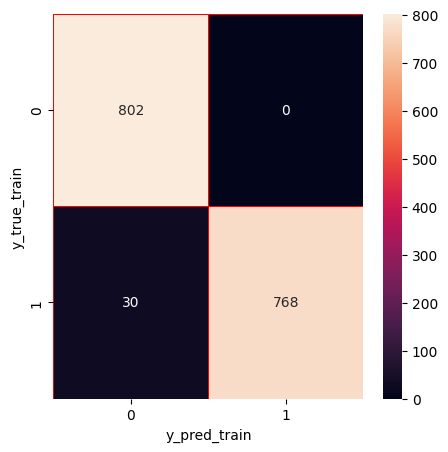

In [34]:
et_score=et_hpo.score(X_train,y_train)
y_predict=et_hpo.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(et_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [35]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

[LightGBM] [Info] Number of positive: 798, number of negative: 802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4302
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 166
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
Accuracy of LightGBM: 0.95
Precision of LightGBM: 0.95
Recall of LightGBM: 0.95
F1-score of LightGBM: 0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       198
           1       0.95      0.95      0.95       202

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



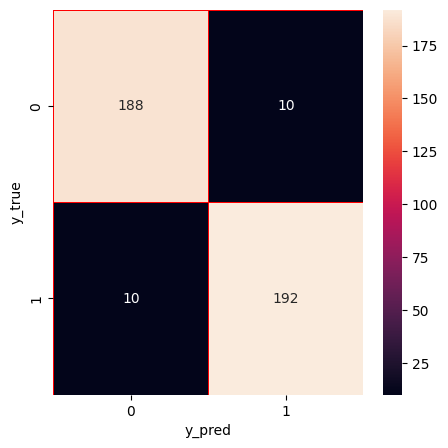

In [36]:
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
y_predict = lgbm.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
tw1a.append(lgbm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM: 1.0
Precision of LightGBM: 1.0
Recall of LightGBM: 1.0
F1-score of LightGBM: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



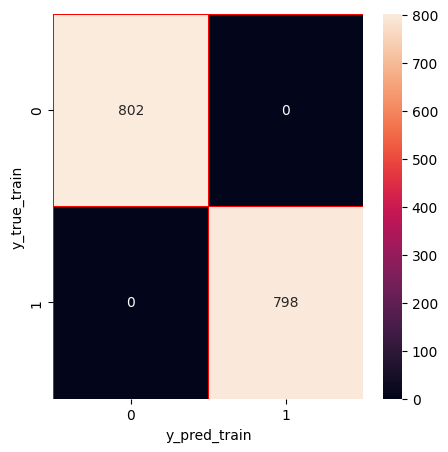

In [37]:
lgbm_score = lgbm.score(X_train, y_train)
y_predict = lgbm.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
ttw1a.append(lgbm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [38]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'num_leaves': int(params['num_leaves']),
        'min_child_samples': int(params['min_child_samples']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree']
    }
    clf = lgb.LGBMClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss':-score, 'status': STATUS_OK }
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'max_depth': hp.quniform('max_depth', 5, 30, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 100, 1),
    'min_child_samples': hp.quniform('min_child_samples', 5, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("LightGBM: Hyperopt estimated optimum {}".format(best))

[LightGBM] [Info] Number of positive: 798, number of negative: 802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3281
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 798, number of negative: 802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4787
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 244
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
Accuracy of LightGBM (Hyperopt): 0.955
Precision of LightGBM (Hyperopt): 0.9550410164065626
Recall of LightGBM (Hyperopt): 0.955
F1-score of LightGBM (Hyperopt): 0.9549966242404541
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       198
           1       0.95      0.96      0.96       202

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95    

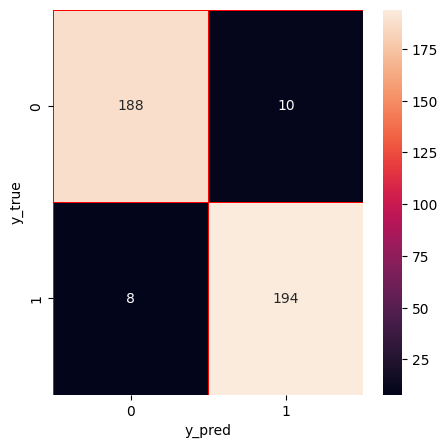

In [39]:
best_params = {
    'n_estimators': 257,
    'max_depth': 28,
    'num_leaves': 24,
    'min_child_samples': 12,
    'learning_rate': 0.03752174097450834,
    'subsample': 0.5526827301399603,
    'colsample_bytree': 0.7989485957307123
}
lgbm_hpo = lgb.LGBMClassifier(**best_params, random_state=0)
lgbm_hpo.fit(X_train, y_train)
lgbm_score = lgbm_hpo.score(X_test, y_test)
y_predict = lgbm_hpo.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
th1a.append(lgbm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM (Hyperopt): 1.0
Precision of LightGBM (Hyperopt): 1.0
Recall of LightGBM (Hyperopt): 1.0
F1-score of LightGBM (Hyperopt): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



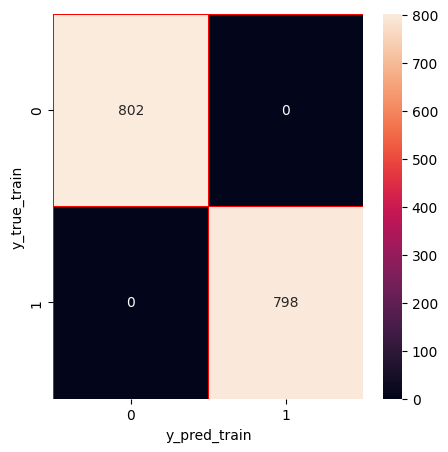

In [40]:
lgbm_score = lgbm_hpo.score(X_train, y_train)
y_predict = lgbm_hpo.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(lgbm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [41]:
lgbm_train=lgbm_hpo.predict(X_train)
lgbm_test=lgbm_hpo.predict(X_test)

Accuracy of AdaBoost: 0.9425
Precision of AdaBoost: 0.9426081902047551
Recall of AdaBoost: 0.9425
F1-score of AdaBoost: 0.9425010781317382
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       198
           1       0.95      0.94      0.94       202

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



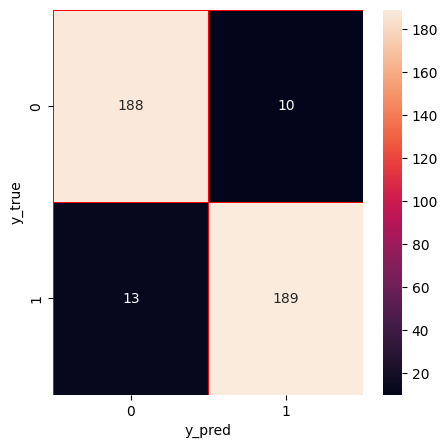

In [42]:
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)
adaboost_score = adaboost.score(X_test, y_test)
y_predict = adaboost.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
tw1a.append(adaboost_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost: 0.9875
Precision of AdaBoost: 0.9876488095238095
Recall of AdaBoost: 0.9875
F1-score of AdaBoost: 0.9874987693754992
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       802
           1       1.00      0.98      0.99       798

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



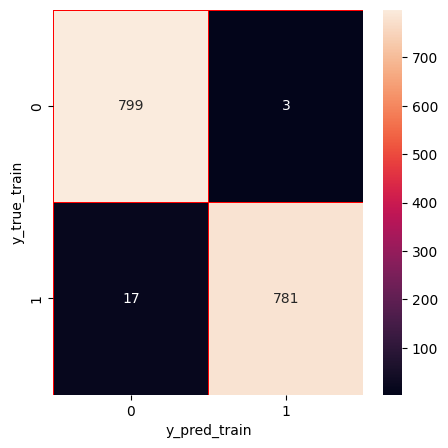

In [43]:
adaboost_score = adaboost.score(X_train, y_train)
y_predict = adaboost.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
ttw1a.append(adaboost_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
    }
    clf = AdaBoostClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss': -score, 'status': STATUS_OK}
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)
print("AdaBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [01:05<00:00,  3.26s/trial, best loss: -0.9525]
AdaBoost: Hyperopt estimated optimum {'learning_rate': 0.43878194605774057, 'n_estimators': 218.0}


Accuracy of AdaBoost (Hyperopt): 0.95
Precision of AdaBoost (Hyperopt): 0.950390625
Recall of AdaBoost (Hyperopt): 0.95
F1-score of AdaBoost (Hyperopt): 0.9499812382739212
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       198
           1       0.94      0.97      0.95       202

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



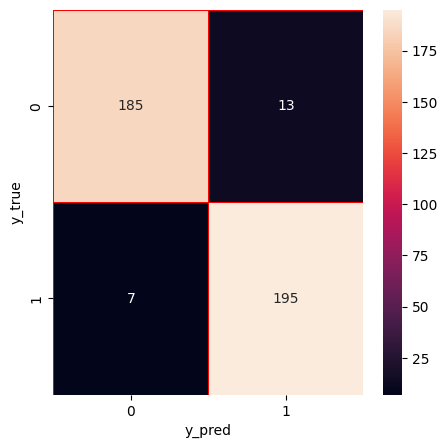

In [45]:
best_params = {
    'n_estimators': 223,
    'learning_rate': 0.34115041954326975,
}
adaboost_hpo = AdaBoostClassifier(**best_params, random_state=0)
adaboost_hpo.fit(X_train, y_train)
adaboost_score = adaboost_hpo.score(X_test, y_test)
y_predict = adaboost_hpo.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
th1a.append(adaboost_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost (Hyperopt): 1.0
Precision of AdaBoost (Hyperopt): 1.0
Recall of AdaBoost (Hyperopt): 1.0
F1-score of AdaBoost (Hyperopt): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



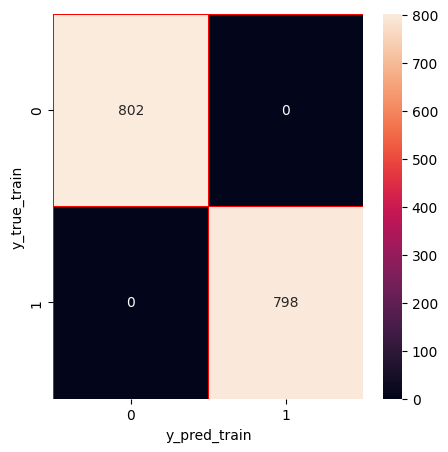

In [46]:
adaboost_score = adaboost_hpo.score(X_train, y_train)
y_predict = adaboost_hpo.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(adaboost_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [47]:
ttw = [ttw1a,ttw1p,ttw1r,ttw1f]
tw = [tw1a,tw1p,tw1r,tw1f]
tth = [tth1a,tth1p,tth1r,tth1f]
th = [th1a,th1p,th1r,th1f]
ttw = pd.DataFrame(ttw).transpose()
ttw.columns = ["Accuracy","Precision","Recall","F1Score"]
ttw.index = ["xgb","rf","dt","et","lgbm","adaboost"]
tw = pd.DataFrame(tw).transpose()
tw.columns = ["Accuracy","Precision","Recall","F1Score"]
tw.index = ["xgb","rf","dt","et","lgbm","adaboost"]
tth = pd.DataFrame(tth).transpose()
tth.columns = ["Accuracy","Precision","Recall","F1Score"]
tth.index = ["xgb","rf","dt","et","lgbm","adaboost"]
th = pd.DataFrame(th).transpose()
th.columns = ["Accuracy","Precision","Recall","F1Score"]
th.index = ["xgb","rf","dt","et","lgbm","adaboost"]

In [48]:
df = pd.concat([ttw,tw,tth,th],axis=1)

In [49]:
df

,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score
xgb,0.95875,0.959895,0.95875,0.958722,0.9325,0.933054,0.9325,0.932491,0.998125,0.998132,0.998125,0.998125,0.9525,0.952509,0.9525,0.952499
rf,1.00000,1.000000,1.00000,1.000000,0.9675,0.967600,0.9675,0.967496,0.947500,0.948730,0.947500,0.947460,0.9325,0.934994,0.9325,0.932430
dt,1.00000,1.000000,1.00000,1.000000,0.8975,0.897574,0.8975,0.897487,0.892500,0.892906,0.892500,0.892467,0.8575,0.857759,0.8575,0.857496
et,1.00000,1.000000,1.00000,1.000000,0.9675,0.968435,0.9675,0.967476,0.981250,0.981926,0.981250,0.981243,0.9675,0.967800,0.9675,0.967499
lgbm,1.00000,1.000000,1.00000,1.000000,0.9500,0.950000,0.9500,0.950000,1.000000,1.000000,1.000000,1.000000,0.9550,0.955041,0.9550,0.954997
adaboost,0.98750,0.987649,0.98750,0.987499,0.9425,0.942608,0.9425,0.942501,1.000000,1.000000,1.000000,1.000000,0.9500,0.950391,0.9500,0.949981


In [50]:
df.to_excel("output.xlsx")